In [ ]:
!pip install gradio==4.2.0

  Using cached gradio-4.2.0-py3-none-any.whl.metadata (17 kB)
  Using cached aiofiles-23.2.1-py3-none-any.whl.metadata (9.7 kB)
  Using cached ffmpy-0.4.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached gradio_client-0.7.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached python_multipart-0.0.9-py3-none-any.whl.metadata (2.5 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached tomlkit-0.12.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached websockets-11.0.3-py3-none-any.whl.metadata (6.6 kB)
Using cached gradio-4.2.0-py3-none-any.whl (15.4 MB)
Using cached gradio_client-0.7.0-py3-none-any.whl (302 kB)
Using cached tomlkit-0.12.0-py3-none-any.whl (37 kB)
Using cached aiofiles-23.2.1-py3-none-any.whl (15 kB)
   ---------------------------------------- 0.0/658.1 kB ? eta -:--:--
   ----- ---------------------------------- 92.2/658.1 kB 2.6 MB/s eta 0:00:01
   -----------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# 목록 저장

In [25]:
import pandas as pd

df = pd.read_csv('filtered_review.csv')
df.head()

,식당,리뷰
0,호반,Rating : 👍👍👍\nPlace : 낙원동 호반\n\n종로 3가 낙원상가 인근에...
1,호반,"여기 진짜 노포 찐맛집이네요. 병어조림을 먹었는데, 양념벨런스가 너무 좋고 입에서 ..."
2,호반,순대국밥에 들어있는 순대가 너무 특이하네요. 하얀색 대창??에 속에 두부가 들어있어...
3,호반,예전부터 여러 블러거들의 맛있다는 소문은 들었지만 우연찮게 지나다 들렀던 집.\n...
4,호반,"순대를 좋아하고, 노포를 좋아한다면 가볼만한 곳\n다만 가게가 크지 않아 1차보다는..."


In [26]:
len(set(df['식당']))

276

In [27]:
import pickle

with open('store.pkl', 'wb') as f:
  pickle.dump(set(df['식당']), f)

In [28]:
store = set()
with open('store.pkl', 'rb') as f:
  store = pickle.load(f)

In [29]:
len(store)

276

In [30]:
store

{'1인피자피자먹다-일산역점',
 '60년전통신촌황소곱창 건대직영점',
 '853',
 'bd버거 성수',
 '가양칼국수버섯매운탕',
 '간장삼겹살 동방생고기 건대점',
 '갈빗',
 '감동식당',
 '감성타코 건대점',
 '강강술래 상계점',
 '강남진해장',
 '건대 숯불부자곱창',
 '건대사시미',
 '건대우동집',
 '건대커피 랩',
 '건대포항막회',
 '경복식당',
 '경성양육관 건대',
 '경성초밥',
 '경양식이화-죽전점',
 '고레카레-장항점',
 '고로고로 성수',
 '고반식당 서여의도점',
 '고베규카츠 건대점',
 '고육담 건대본점',
 '고향양꼬치 건대점',
 '곰국시집',
 '곳 노원본점',
 '공덕리 산장',
 '구구당',
 '구구향훠궈 건대직영점',
 '굴림샤브&콩국수 건대점',
 '금각도 여의도점',
 '금자네생등심',
 '기후',
 '꾸아 건대점',
 '꾸아 성수점',
 '나리식당 청담',
 '날라리 범 건대점',
 '남도식당',
 '남산산채집',
 '냅다청양집 노원역점',
 '노원왕곱창',
 '노크 건대직영점',
 '농부와닭동네 여의도MBC점',
 '뉴웨이브서울 건대점',
 '니뽕내뽕 건대본점',
 '니뽕내뽕 노원역점',
 '니토',
 '닭한마리 공릉본점',
 '당산끝집',
 '대원집',
 '도도곱창 건대본점',
 '도쿄빙수 건대점',
 '돈까스먹는용만이',
 '돈돈정 그랑서울점',
 '동경화로 문래점',
 '동해참치-보정점',
 '돼봉삼겹살 건대점',
 '뜨거웍시애틀아시안퓨전',
 '라화쿵부 건대점',
 '로니로티 건대점',
 '로니로티 노원점',
 '로바 더현대서울점',
 '리틀파스타 공릉본점',
 '마굿간생고기',
 '마녀짜장-수원월드컵점',
 '마라왕',
 '마라집-수지성복지점',
 '마라집-용인보정지점',
 '마초쉐프 건대점',
 '마츠노하나 더현대서울점',
 '만경상회 건대본점',
 '맛짱조개',
 '맥주꾼 건대본점',
 '메시야',
 '목포집',
 '몽실디저트',
 '무끼',
 '무식당 성수본점',
 '무월식탁 타

# LLM

In [ ]:
# LLM 환경 만들기
from langchain.prompts import PromptTemplate
import os
from langchain.llms import OpenAI

os.environ['OPENAI_API_KEY'] = ''

In [34]:
# 100개의 리뷰를 넣는 프롬프트템플릿 만들기
template = """
너는 {store} 식당의 리뷰들을 요약해주는 ai야.
리뷰들 요약해서 맛, 양, 가격, 서비스 부분에서 어떤지 줄글로 설명해줘.
리뷰는 {text}야.
"""

query = '서울뚝배기'
template = PromptTemplate.from_template(template=template)
custom_prompt = template.format(store=query, text=[review for review in df.loc[df['식당']==query, '리뷰'][:100]])

gpt = OpenAI(
    model_name="gpt-4o-mini",
    temperature = 0.3
    )


response = gpt.invoke(custom_prompt)

for chunk in response:
    print(chunk, end="", flush=True)

C:\NLP\nlp\Lib\site-packages\langchain_community\llms\openai.py:253: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain_community.chat_models import ChatOpenAI`
  warnings.warn(
C:\NLP\nlp\Lib\site-packages\langchain_community\llms\openai.py:1076: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain_community.chat_models import ChatOpenAI`
  warnings.warn(


서울뚝배기 식당에 대한 리뷰를 종합해보면, 전반적으로 맛, 양, 가격, 서비스 모두에서 긍정적인 평가를 받고 있습니다.

**맛**: 이 식당의 대표 메뉴인 해물된장찌개와 미역국, 북어국은 대체로 맛있다는 의견이 많습니다. 특히 해물된장찌개는 진한 국물 맛이 좋고, 미역국과 북어국도 깔끔하고 건강한 맛으로 호평받고 있습니다. 반찬들도 신선하고 맛있다는 평가가 많아, 전반적으로 음식의 맛이 만족스럽다는 점이 강조됩니다.

**양**: 식사 메뉴는 가격 대비 양이 적당하다는 의견이 많습니다. 9,000원의 가격에 제공되는 메뉴는 한 끼 식사로 충분하며, 비빔밥 재료가 함께 제공되어 양을 늘릴 수 있는 점도 긍정적으로 언급됩니다. 다만, 일부 리뷰에서는 반찬의 양이 다소 부족하다는 지적도 있습니다.

**가격**: 가격은 대체로 합리적이라는 평가가 많습니다. 9,000원이라는 가격에 비해 음식의 질과 양이 괜찮다는 의견이 많아 가성비가 좋다고 할 수 있습니다. 특히 점심 메뉴는 8,000원으로 제공되어 부담 없이 이용할 수 있는 점이 장점으로 꼽힙니다.

**서비스**: 서비스는 전반적으로 신속하고 친절하다는 평가가 많습니다. 직원들이 친절하게 응대하며, 음식이 빨리 나오는 점이 바쁜 직장인들에게 특히 좋다는 의견이 있습니다. 다만, 일부 리뷰에서는 서비스가 다소 아쉬운 부분도 있다는 언급이 있었습니다.

결론적으로, 서울뚝배기 식당은 맛과 가격, 서비스 모두에서 긍정적인 평가를 받고 있으며, 특히 해물된장찌개와 미역국이 인기 있는 메뉴로 자리 잡고 있습니다. 건강한 한식을 원하시는 분들에게 추천할 만한 곳입니다.

## 함수 만들기

In [38]:
def summary(query):
  query = query.replace(' ', '')

  if query == '':
    return '가게 이름을 입력해주세요!'
  if query not in store:
    return '가게 이름이 잘못되었습니다!'
  custom_prompt = template.format(store=query, text=[review for review in df.loc[df['식당']==query, '리뷰'][:100]])

  response = gpt.invoke(custom_prompt)

  chunk = ''
  for res in response:
    chunk += res
  return chunk

s = summary('서울 뚝배기')

In [39]:
print(s)

서울뚝배기 식당에 대한 리뷰들을 종합해보면, 이곳은 전통적인 한식 메뉴를 제공하는 식당으로, 주로 미역국, 된장국, 순두부찌개, 북어국 등 4가지 찌개를 아침 시간에 주로 판매합니다. 

**맛**: 전반적으로 음식의 맛은 만족스럽다는 평이 많습니다. 특히 미역국과 해물된장찌개는 깊고 깔끔한 맛으로 호평을 받으며, 반찬들도 신선하고 맛있다는 의견이 많습니다. 그러나 일부 리뷰에서는 특정 메뉴가 평범하다는 의견도 있어, 개인의 취향에 따라 다소 차이가 있을 수 있습니다.

**양**: 양에 대한 평가는 대체로 긍정적입니다. 식사와 함께 제공되는 반찬들이 적절히 구성되어 있어, 한 끼 식사로 충분하다는 의견이 많습니다. 특히 비빔밥 재료가 제공되어 추가적인 맛을 즐길 수 있다는 점이 좋게 평가됩니다.

**가격**: 가격은 9,000원으로 저렴한 편이며, 가성비가 뛰어나다는 평이 많습니다. 특히 이 가격에 제공되는 음식의 질과 양을 고려할 때, 매우 합리적이라는 의견이 지배적입니다.

**서비스**: 서비스는 전반적으로 신속하고 친절하다는 평가를 받고 있습니다. 직원들이 바쁜 시간에도 효율적으로 서빙을 해주며, 고객 응대가 잘 되어 있다는 점이 긍정적으로 언급되고 있습니다. 다만, 일부 리뷰에서는 서비스가 다소 부족하다는 의견도 있어, 일관성에 대한 아쉬움이 남기도 합니다.

종합적으로 서울뚝배기 식당은 전통적인 한식을 저렴한 가격에 제공하며, 맛과 양, 서비스 모두에서 괜찮은 평가를 받고 있는 곳으로, 특히 아침식사나 간단한 점심을 원하는 손님들에게 추천할 만한 식당입니다.


# 그라디오

In [ ]:
import pandas as pd

df = pd.read_csv('filtered_review.csv')
df.head()

In [ ]:
import gradio as gr

template = """
  너는 {store} 식당의 리뷰들을 요약해주는 ai야.
  리뷰들 요약해서 맛, 양, 가격, 서비스 부분에서 어떤지 줄글로 설명해줘.
  리뷰는 {text}야.
"""

template = PromptTemplate.from_template(template=template)
gpt = OpenAI(
      model_name="gpt-4o-mini",
      temperature = 0.3
)

In [ ]:
store = set()
with open('store.pkl', 'rb') as f:
  store = pickle.load(f)

In [60]:
def summary(query):
  query = query.replace(' ', '')

  if query == '':
    return '가게 이름을 입력해주세요!'
  if query not in store:
    return '가게 이름이 잘못되었습니다!'
  custom_prompt = template.format(store=query, text=[review for review in df.loc[df['식당']==query, '리뷰'][:100]])

  response = gpt.invoke(custom_prompt)

  chunk = ''
  for res in response:
    chunk += res
  return chunk

with gr.Blocks() as app:
  with gr.Row():
    inputs = gr.Textbox(label = '가게',  placeholder='가게 이름을 입력하세요')
    with gr.Column():
      clear_btn = gr.Button('초기화')
      send_btn = gr.Button('제출')

  with gr.Row():
    outputs = gr.Textbox(label='리뷰 요약', lines=3)

  send_btn.click(fn=summary, inputs=inputs, outputs=outputs)
  clear_btn.click(fn = lambda: ['',''], inputs=None, outputs=[inputs, outputs])

app.launch()

Running on local URL:  http://127.0.0.1:7876

To create a public link, set `share=True` in `launch()`.


# 그라디오 화면

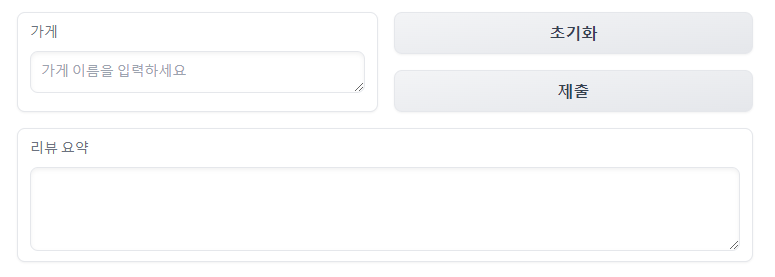

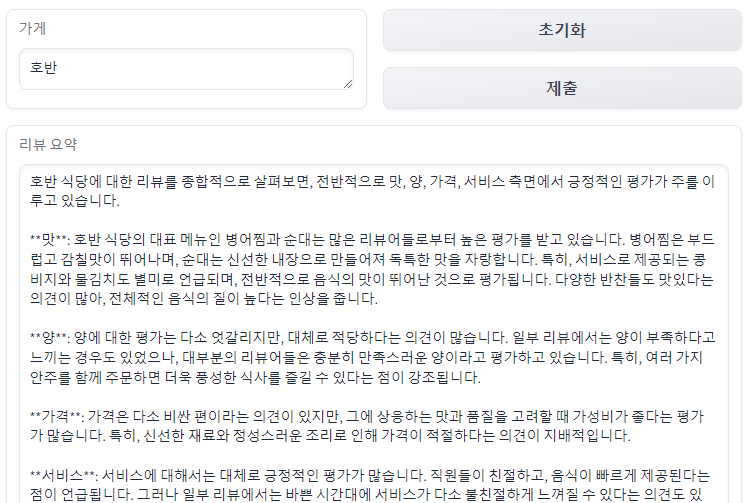